In [162]:
from sympy import *
import numpy as np
import scipy.interpolate as scinter
import matplotlib.pyplot as plt

# zadanie 1


In [144]:
x = Symbol('x')

f = 1/ (1 + 25 * x ** 2)

f

1/(25*x**2 + 1)

In [145]:
der5 = f.diff(x, 5)
der10 = f.diff(x, 10)
der15 = f.diff(x, 15)

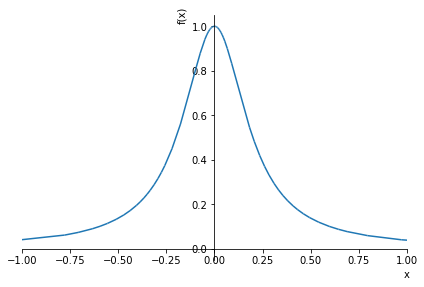

In [146]:
p0 = plot(f, xlim = (-1,1))

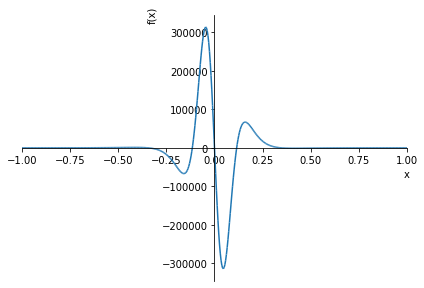

In [147]:
p5 = plot(der5, xlim = (-1,1), adaptive = False, nb_of_points = 5000)

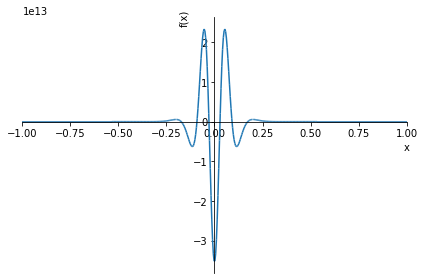

In [148]:
p10 = plot(der10, xlim = (-1,1), adaptive = False, nb_of_points = 5000)

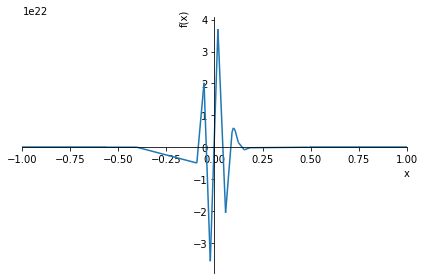

In [159]:
p15 = plot(der15, xlim = (-1,1))

3192564375000000000000000*x*(-12500000000000*x**14/(25*x**2 + 1)**7 + 1750000000000*x**12/(25*x**2 + 1)**6 - 97500000000*x**10/(25*x**2 + 1)**5 + 2750000000*x**8/(25*x**2 + 1)**4 - 41250000*x**6/(25*x**2 + 1)**3 + 315000*x**4/(25*x**2 + 1)**2 - 1050*x**2/(25*x**2 + 1) + 1)/(25*x**2 + 1)**9

In [226]:
def Newton_interpolation(f, n):
    lf = lambdify(x, f)

    points = np.linspace(-1, 1, num= n)
    f_interpolated = scinter.KroghInterpolator(points, lf(points))

    return f_interpolated, points

def Chebyshev_node_interpolation(f, n):
    lf = lambdify(x, f)

    points = np.zeros(n)
    for i in range(n):
        points[i] = cos((2*i + 1)/(2*(n+0)) * pi) ### ????? czemu zamiast 2(n+1) powinno byc 2(n)

    f_interpolated = scinter.KroghInterpolator(points, lf(points))

    return f_interpolated, points

def clamped_cubic_spline_interpolation(f, n):
    lf = lambdify(x, f)

    points = np.linspace(-1, 1, num= n, dtype= float)

    f_interpolated = scinter.CubicSpline(points, lf(points))

    return f_interpolated, points


def plot_interpolation(f, f_interpolated, points):
    lf = lambdify(x, f)
    d = np.linspace(-1, 1, num = 1000)

    plt.plot(d, f_interpolated(d))
    plt.plot(d, lf(d))
    plt.scatter(points, f_interpolated(points))
    plt.show()

In [227]:
def error_func(f, interpolated):
    lf = lambdify(x, f)
    return lambda p : abs(lf(p) - interpolated(p))

def plot_error_func(error_func):
    d = np.linspace(-1, 1, num = 1000)

    plt.plot(d, error_func(d))
    plt.show()

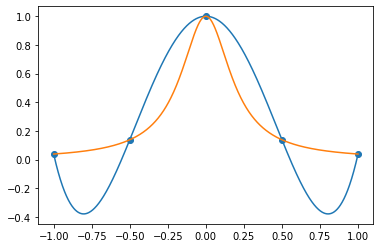

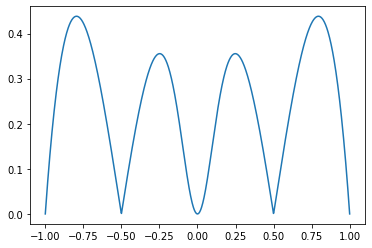

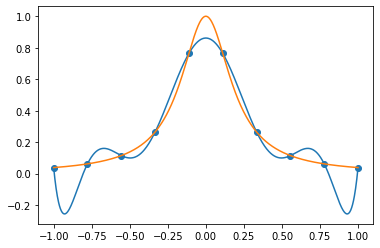

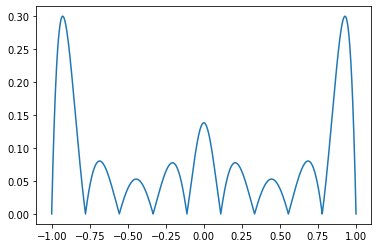

In [229]:
polyNewton5, points5 = Newton_interpolation(f, 5)
plot_interpolation(f, polyNewton5, points5)
plot_error_func(error_func(f,polyNewton5))

polyNewton10, points10 = Newton_interpolation(f, 10)
plot_interpolation(f, polyNewton10, points10)
plot_error_func(error_func(f,polyNewton10))

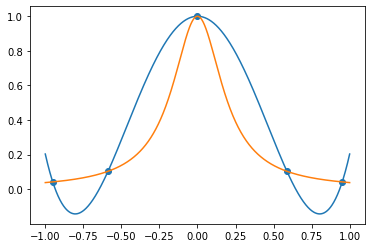

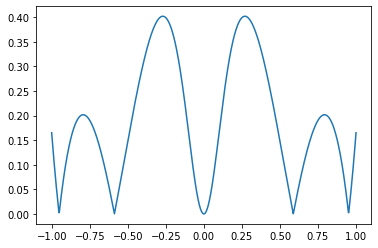

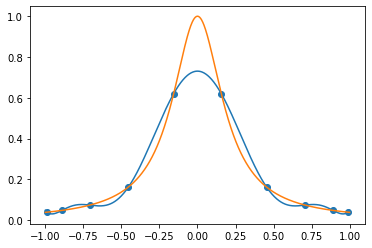

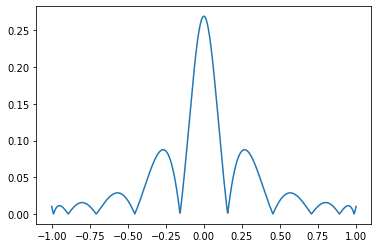

In [230]:
polyChebyshev5, points5 = Chebyshev_node_interpolation(f, 5)
plot_interpolation(f, polyChebyshev5, points5)
plot_error_func(error_func(f,polyChebyshev5))

polyChebyshev10, points10 = Chebyshev_node_interpolation(f, 10)
plot_interpolation(f, polyChebyshev10, points10)
plot_error_func(error_func(f,polyChebyshev10))

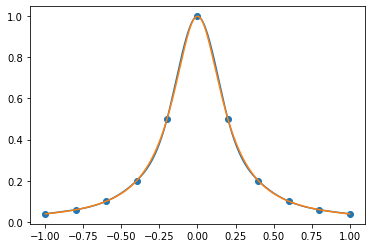

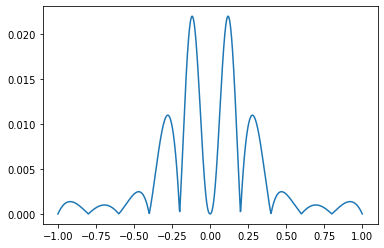

In [231]:
spline, points5 = clamped_cubic_spline_interpolation(f, 11)
plot_interpolation(f, spline, points5)
plot_error_func(error_func(f,spline))




In [ ]:
from random import uniform

test_points = [uniform(-1,1) for _ in range(15)]
lf = lambdify(x, f)

Newton_errors = []
Chebyshev_errors = []


for point in test_points:
    # print(point, lf(point), polyNewton10(point), polyChebyshev10(point), spline(point),
    #       calculate_error(f, polyNewton10, point), calculate_error(f, polyChebyshev10, point),
    #       calculate_error(f, spline, point))
    # print()

